# TFM

**TFM RELACIONADA CON ESTUDIOS ECONOMÉTRICOS EN EL SECTOR ENERGÉTICO**

Desarrollar una herramienta de visualización de matrices energéticas considerando participación de cada tecnología en la oferta energética y eléctrica, eficiencia en la generación, pérdidas de transformación y distribución, demandas de energías primarias y secundarias sectoriales, tasa de electrificación, dependencia externa e intensidades energéticas y eléctricas sectoriales, entre otros.

La estructura general del proyecto:

**Carga y preparación de datos:** Leer los datos del archivo de Excel utilizando pandas (pandas.read_excel). Luego, procesar los datos para obtener las listas de "source", "target" y "value". 

In [13]:
import pandas as pd

# Carga del archivo
df = pd.read_excel('C:\\Users\\hp\\Documents\\TFM\\Balance Energetico resumido_DataConsolidada_Brasil_1970_2021_RMFP.xlsx')
#este es el data set con el balance "resumido"

# Imprime las primeras 5 filas de datos para confirmar que se ha leído correctamente
df.head()

,Consumo Final,O.T. Derivados de petróleo,O.T. Coque + O.T. carbón vegetal,O.T. Petróleo,O.T. Gas natural,O.T. Carbón mineral,O.T. Hidroenergía,O.T. Nuclear,O.T. Otras primarias,O.T. Electricidad,O.T. Leña,O.T. Caña de azúcar y der.,Año,Unidad
0,Oferta total,24833.786237,1869.517930,25664.247145,180.021601,2235.385458,3421.516730,NaN,223.240675,3930.519185,31851.532711,3600.695077,1970,10³ tep
1,Carboneras + Cq. y A.Hornos,375.319791,1707.432801,NaN,NaN,1483.729183,NaN,NaN,NaN,NaN,3493.851863,NaN,1970,10³ tep
2,Centrales eléctricas,1184.488736,NaN,NaN,NaN,464.091591,3421.516772,NaN,81.155535,3932.238497,12.704915,88.986263,1970,10³ tep
3,Refinerías,24598.317588,55.177918,25535.854214,104.223045,158.934271,NaN,NaN,NaN,NaN,NaN,NaN,1970,10³ tep
4,"Agro, pesca y minería",403.698938,19.372248,NaN,NaN,NaN,NaN,NaN,NaN,27.251094,4900.688911,NaN,1970,10³ tep


**Creación del diagrama de Sankey:** Usa el códigosiguiente como base y reemplazar las listas de "label", "source", "target" y "value" con tus datos. Puedes cambiar los colores, el título y otros elementos del gráfico para que se ajusten a tus necesidades.

# Código básico en Python para crear un Diagrama de Sankey:

In [14]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["A1", "A2", "B1", "B2", "C1", "C2"],
      color = "blue"
    ),
    link = dict(
      source = [0, 1, 0, 2, 3, 3], # índices correspondientes a las etiquetas, p.ej., A1, A2, A1, B1, etc.
      target = [2, 3, 3, 4, 4, 5],
      value = [8, 4, 2, 8, 4, 2]
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

In [15]:
import plotly.graph_objects as go
import numpy as np

# Filtrar datos para el año 2021
df_2021 = df[df["Año"] == 2021]

# Fuentes de energía (columnas "O.T. ...")
fuentes = ["O.T. Derivados de petróleo", "O.T. Coque + O.T. carbón vegetal", 
           "O.T. Petróleo", "O.T. Gas natural", "O.T. Carbón mineral",
           "O.T. Hidroenergía", "O.T. Nuclear", "O.T. Otras primarias", 
           "O.T. Electricidad", "O.T. Leña", "O.T. Caña de azúcar y der."]

# Sectores de consumo (valores únicos en la columna "Consumo Final")
sectores = df_2021["Consumo Final"].unique()

# Crear listas para guardar los datos del diagrama de Sankey
labels = list(fuentes) + list(sectores)  # las etiquetas son las fuentes y los sectores
source = []  # índices de las fuentes
target = []  # índices de los destinos
value = []  # valores de los flujos

# Llenar las listas source, target y value
for i, fuente in enumerate(fuentes):
    for j, sector in enumerate(sectores):
        valor = df_2021.loc[df_2021["Consumo Final"] == sector, fuente].values
        if valor.size > 0 and not np.isnan(valor[0]):  # ignorar los valores NaN
            source.append(i)
            target.append(len(fuentes) + j)  # los índices de los destinos empiezan después de los índices de las fuentes
            value.append(valor[0])

# Crear el diagrama de Sankey
fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = labels,
        color = "blue"
    ),
    link = dict(
        source = source,
        target = target,
        value = value
    )
)])

fig.update_layout(title_text="Flujo de energía en Brasil en 2021", font_size=10)
fig.show()

**PARA LAS PREDICCIONES**

En lo que respecta a las predicciones futuras, las series temporales y el modelo ARIMA son en efecto opciones populares en el análisis de datos de energía. ARIMA es un tipo de modelo de series temporales que puede manejar tendencias y estacionalidad en los datos, lo cual puede ser muy relevante en el sector energético.

Otras técnicas que podrías considerar incluyen los modelos de regresión con variables que esperas que influyan en el consumo de energía (como el crecimiento económico, las políticas energéticas, los precios de la energía, etc.), los modelos de aprendizaje automático (como las redes neuronales o los bosques aleatorios) y los modelos de predicción basados en física (como los modelos de demanda de energía basados en las condiciones climáticas).

La primera etapa en la aplicación de ARIMA es asegurar de que los datos sean estacionarios, es decir, que la media y la varianza sean constantes en el tiempo. Una manera de verificar la estacionariedad de los datos es a través de la Prueba de Dickey-Fuller Aumentada.

In [16]:
from statsmodels.tsa.stattools import adfuller

# Selecciona la serie temporal que se quiere analizar. 
# Por ejemplo, utilizaremos la producción total de energía de "O.T. Derivados de petróleo".
serie_temporal = df[df['Consumo Final'] == 'Oferta total']['O.T. Derivados de petróleo']

# Realizar la prueba de Dickey-Fuller
resultado = adfuller(serie_temporal.dropna())
print('ADF Statistic: %f' % resultado[0])
print('p-value: %f' % resultado[1])


ADF Statistic: -0.965113
p-value: 0.765775


Si el valor de p es menor a 0.05, podemos asumir que los datos son estacionarios. En caso contrario, tendrías que diferenciar la serie temporal para hacerla estacionaria. Esto se puede hacer utilizando la función diff() en la serie temporal.

serie_temporal_diferenciada = serie_temporal.diff().dropna()

Una vez que tenemos una serie temporal estacionaria, podemos usar el método de auto-arima para encontrar los mejores parámetros p, d y q para el modelo ARIMA.

In [12]:
!pip install pmdarima

     ------------------------------------ 569.7/569.7 kB 688.2 kB/s eta 0:00:00
     ---------------------------------------- 2.8/2.8 MB 2.7 MB/s eta 0:00:00


In [17]:
from pmdarima.arima import auto_arima

# Ajustando el modelo ARIMA
modelo = auto_arima(serie_temporal, trace=True, error_action='ignore', suppress_warnings=True)
modelo.fit(serie_temporal)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=993.179, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=991.708, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=992.583, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=992.871, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1003.245, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=994.197, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.423 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

El modelo ARIMA está listo para hacer predicciones una vez que ha sido entrenado.

Este código predice los próximos 10 períodos de tiempo en la serie temporal.

In [18]:
# Convierte 'Año' a una fecha en formato DateTime
df['Año'] = pd.to_datetime(df['Año'], format='%Y')

# Establece 'Año' como el índice de tu DataFrame
df.set_index('Año', inplace=True)

# Ahora selecciona la serie temporal
serie_temporal = df[df['Consumo Final'] == 'Oferta total']['O.T. Derivados de petróleo']

# Ahora ajusta y realiza las predicciones con tu modelo
modelo = auto_arima(serie_temporal, trace=True, error_action='ignore', suppress_warnings=True)
modelo.fit(serie_temporal)

# Realiza las predicciones para los próximos 10 años
predicciones = modelo.predict(n_periods=10)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=993.179, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=991.708, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=992.583, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=992.871, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1003.245, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=994.197, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.461 seconds


El modelo ARIMA seleccionado tiene la siguiente configuración: ARIMA(0,1,0), lo que significa que no tiene términos auto-regresivos ni de media móvil, sólo un término de diferenciación.

Para realizar predicciones con el modelo seleccionado, se puede usar el método predict(). Proporcionará las predicciones para un número especificado de pasos en el futuro. 

In [19]:
# Número de pasos a predecir
pasos = 10

# Predicciones
predicciones = modelo.predict(n_periods=pasos)

# Imprime las predicciones
print(predicciones)

2022-01-01    136131.340955
2023-01-01    138271.678545
2024-01-01    140412.016136
2025-01-01    142552.353727
2026-01-01    144692.691317
2027-01-01    146833.028908
2028-01-01    148973.366499
2029-01-01    151113.704090
2030-01-01    153254.041680
2031-01-01    155394.379271
Freq: AS-JAN, dtype: float64


Como estamos prediciendo futuros...no tenemos valores reales para compararlos...En ese caso, se puede dividir los datos en un conjunto de entrenamiento y prueba, utilizar el conjunto de entrenamiento para ajustar el modelo y luego evaluar las predicciones del modelo en el conjunto de prueba.
La forma correcta de dividir los datos de la serie temporal es en orden cronológico. Por ejemplo, si tienes 100 datos en total, puedes entrenar el modelo con los primeros 80 y probar el modelo con los últimos 20.

In [20]:
# Establece el número de datos de prueba
num_test = 20

# Divide los datos en entrenamiento y prueba
train = serie_temporal[:-num_test]
test = serie_temporal[-num_test:]

# Entrena el modelo con los datos de entrenamiento
modelo = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
modelo.fit(train)

# Realiza predicciones para el número de pasos que corresponde al tamaño de los datos de prueba
predicciones = modelo.predict(n_periods=num_test)

# Evalúa las predicciones con los datos de prueba
rmse = sqrt(mean_squared_error(test, predicciones))
print('RMSE: ', rmse)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=582.085, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=577.624, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=577.733, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=577.003, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=595.526, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=578.392, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=580.129, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=580.527, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=588.047, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.430 seconds
RMSE:  9104.597301389002


El RMSE (Root Mean Square Error) es una medida de cuán bien el modelo pudo predecir los datos de prueba. En otras palabras, en promedio, cuánto se desvían las predicciones del modelo de los valores reales en tus datos de prueba.

La interpretación del RMSE depende del contexto y del rango de valores en tus datos. Un RMSE de 9104.597301389002 podría ser excelente si el rango de tus datos es en millones, pero no tan bueno si tus datos están en el rango de cientos.

En general, cuanto más bajo es el RMSE, mejor, ya que indica que las predicciones del modelo están más cerca de los valores reales. Sin embargo, un RMSE por sí solo no siempre es suficiente para evaluar la calidad de un modelo. También podría ser útil comparar las predicciones con los valores reales para obtener una idea visual de cómo de bien se desempeñó el modelo.

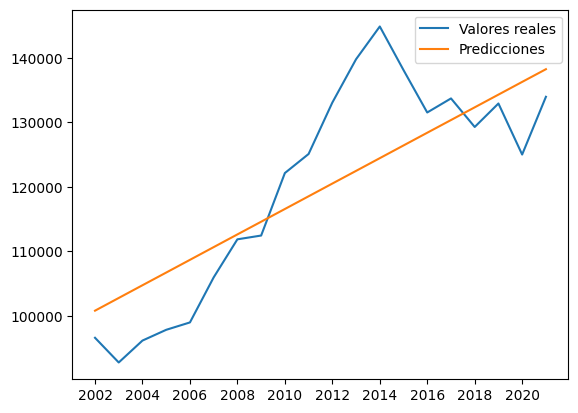

In [21]:
import matplotlib.pyplot as plt

plt.plot(test.index, test.values, label='Valores reales')
plt.plot(test.index, predicciones, label='Predicciones')
plt.legend()
plt.show()

# AQUI MÁS DE LA GRAFICA DEL 2021 (Solo del 2021 dataset - Matriz no resumida)

In [22]:
import pandas as pd

# Carga del archivo
df_matriz = pd.read_excel('C:\\Users\\hp\\Documents\\TFM\\Matriz de balance energético_Brasil_2021.xlsx')

# Imprime las primeras 5 filas de datos para confirmar que se ha leído correctamente
df_matriz.head()

,Consumo Final,PETRÓLEO,GAS NATURAL,CARBÓN MINERAL,HIDROENERGÍA,GEOTERMIA,NUCLEAR,LEÑA,CAÑA DE AZÚCAR Y DERIVADOS,OTRAS PRIMARIAS,...,KEROSENE/JET FUEL,DIÉSEL OIL,FUEL OIL,COQUE,CARBÓN VEGETAL,GASES,OTRAS SECUNDARIAS,NO ENERGÉTICO,TOTAL SECUNDARIAS,TOTAL
0,NaN,10³ tep,10³ tep,10³ tep,10³ tep,10³ tep,10³ tep,10³ tep,10³ tep,10³ tep,...,10³ tep,10³ tep,10³ tep,10³ tep,10³ tep,10³ tep,10³ tep,10³ tep,10³ tep,10³ tep
1,PRODUCCIÓN,152713.425002,26371.482146,2633.079044,31125.011603,NaN,3835.74802,26017.951804,49469.74218,28037.316314,...,3278.258909,41972.42672,16109.248741,6866.858956,3915.43187,2060.140768,9109.184635,5630.957429,189790.508873,320203.756113
2,IMPORTACIÓN,7359.208707,14796.233319,13216.311296,NaN,NaN,NaN,NaN,NaN,NaN,...,300.40778,12211.924371,581.739557,1150.158062,NaN,NaN,2901.18139,1712.362714,31674.902429,67046.655752
3,EXPORTACIÓN,65724.070416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1064.332039,499.295136,11963.08217,NaN,NaN,NaN,841.833833,385.763648,17331.462043,83055.532459
4,VARIACIÓN DE INVENTARIOS,-1007.779344,-3598.925512,67.818618,NaN,NaN,NaN,NaN,NaN,NaN,...,-52.571462,-22.664968,-431.70792,-92.497851,NaN,NaN,-25.305896,-8.201028,-35.624266,-4574.510504


In [23]:
import plotly.graph_objects as go
import numpy as np

# Fuentes de energía (columnas "O.T. ...")
fuentes = ["PETRÓLEO", "GAS NATURAL", 
           "CARBÓN MINERAL", "HIDROENERGÍA", "NUCLEAR",
           "OTRAS PRIMARIAS", "LEÑA", "CAÑA DE AZÚCAR Y DERIVADOS"]

# Sectores de consumo (valores únicos en la columna "Consumo Final")
sectores = df_matriz["Consumo Final"].unique()

# Crear listas para guardar los datos del diagrama de Sankey
labels = list(fuentes) + list(sectores)  # las etiquetas son las fuentes y los sectores
source = []  # índices de las fuentes
target = []  # índices de los destinos
value = []  # valores de los flujos

# Llenar las listas source, target y value
for i, fuente in enumerate(fuentes):
    for j, sector in enumerate(sectores):
        valor = df_matriz.loc[df_matriz["Consumo Final"] == sector, fuente].values
        if valor.size > 0 and not np.isnan(valor[0]):  # ignorar los valores NaN
            source.append(i)
            target.append(len(fuentes) + j)  # los índices de los destinos empiezan después de los índices de las fuentes
            value.append(valor[0])

# Crear el diagrama de Sankey
fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = labels,
        color = "blue"
    ),
    link = dict(
        source = source,
        target = target,
        value = value
    )
)])

fig.update_layout(title_text="Flujo de energía en Brasil en 2021", font_size=10)
fig.show()

In [24]:
import plotly.graph_objects as go
import numpy as np

# Fuentes de energía (columnas "O.T. ...")
fuentes = ["PETRÓLEO", "GAS NATURAL", 
           "CARBÓN MINERAL", "HIDROENERGÍA", "NUCLEAR",
           "OTRAS PRIMARIAS", "LEÑA", "CAÑA DE AZÚCAR Y DERIVADOS"]

# Sectores de consumo (valores únicos en la columna "Consumo Final")
sectores = df_matriz["Consumo Final"].unique()

# Crear listas para guardar los datos del diagrama de Sankey
labels = list(fuentes) + ['Producción + Importación'] + list(sectores)  # las etiquetas son las fuentes y los sectores
source = []  # índices de las fuentes
target = []  # índices de los destinos
value = []  # valores de los flujos

# Llenar las listas source, target y value para los nodos de las fuentes a 'Producción + Importación'
for i, fuente in enumerate(fuentes):
    valor = df_matriz.loc[(df_matriz["Consumo Final"] == "PRODUCCIÓN") | (df_matriz["Consumo Final"] == "IMPORTACIÓN"), fuente].sum()
    if not np.isnan(valor):  # ignorar los valores NaN
        source.append(i)
        target.append(len(fuentes))  # el índice del nodo de 'Producción + Importación' es después de los índices de las fuentes
        value.append(valor)

# Llenar las listas source, target y value para los nodos de 'Producción + Importación' a los sectores
for j, sector in enumerate(sectores):
    if sector not in ['PRODUCCIÓN', 'IMPORTACIÓN']:  # ignorar las filas de 'Producción' e 'Importación'
        valor = df_matriz.loc[df_matriz["Consumo Final"] == sector, fuentes].sum().sum()  # sumar todos los valores para este sector
        if not np.isnan(valor):  # ignorar los valores NaN
            source.append(len(fuentes))  # el índice del nodo de 'Producción + Importación' es después de los índices de las fuentes
            target.append(len(fuentes) + j + 1)  # los índices de los destinos empiezan después del índice de 'Producción + Importación'
            value.append(valor)

# Crear el diagrama de Sankey
fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = labels,
        color = "blue"
    ),
    link = dict(
        source = source,
        target = target,
        value = value
    )
)])

fig.update_layout(title_text="Flujo de energía en Brasil en 2021", font_size=10)
fig.show()

In [25]:
import plotly.graph_objects as go
import numpy as np

# Fuentes de energía (columnas "O.T. ...")
fuentes = ["PETRÓLEO", "GAS NATURAL", 
           "CARBÓN MINERAL", "HIDROENERGÍA", "NUCLEAR",
           "OTRAS PRIMARIAS", "LEÑA", "CAÑA DE AZÚCAR Y DERIVADOS"]

# Sectores de consumo (valores únicos en la columna "Consumo Final")
sectores = df_matriz["Consumo Final"].unique()

# Crear listas para guardar los datos del diagrama de Sankey
labels = list(fuentes) + ['Refinerías', 'Producción + Importación'] + list(sectores)  
source = []  # índices de las fuentes
target = []  # índices de los destinos
value = []  # valores de los flujos

# Fuentes que pasan por 'Refinerías'
refinerias = ["PETRÓLEO", "GAS NATURAL", "OTRAS PRIMARIAS"]

# Llenar las listas source, target y value para los nodos de las fuentes a 'Refinerías' o 'Producción + Importación'
for i, fuente in enumerate(fuentes):
    valor = df_matriz.loc[(df_matriz["Consumo Final"] == "PRODUCCIÓN") | (df_matriz["Consumo Final"] == "IMPORTACIÓN"), fuente].sum()
    if not np.isnan(valor):  # ignorar los valores NaN
        source.append(i)
        if fuente in refinerias:
            target.append(len(fuentes))  # el índice del nodo de 'Refinerías' es después de los índices de las fuentes
        else:
            target.append(len(fuentes) + 1)  # el índice del nodo de 'Producción + Importación' es después de los índices de las fuentes y 'Refinerías'
        value.append(valor)

# Llenar las listas source, target y value para los nodos de 'Refinerías' a 'Producción + Importación'
valor = sum([value[source.index(i)] for i, x in enumerate(source) if labels[x] in refinerias])
source.append(len(fuentes))
target.append(len(fuentes) + 1)
value.append(valor)

# Llenar las listas source, target y value para los nodos de 'Producción + Importación' a los sectores
for j, sector in enumerate(sectores):
    if sector not in ['PRODUCCIÓN', 'IMPORTACIÓN']:  # ignorar las filas de 'Producción' e 'Importación'
        valor = df_matriz.loc[df_matriz["Consumo Final"] == sector, fuentes].sum().sum()  # sumar todos los valores para este sector
        if not np.isnan(valor):  # ignorar los valores NaN
            source.append(len(fuentes) + 1)  # el índice del nodo de 'Producción + Importación' es después de los índices de las fuentes y 'Refinerías'
            target.append(len(fuentes) + j + 2)  # los índices de los destinos empiezan después del índice de 'Producción + Importación'
            value.append(valor)

# Crear el diagrama de Sankey
fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = labels,
        color = "blue"
    ),
    link = dict(
        source = source,
        target = target,
        value = value
    )
)])

fig.update_layout(title_text="Flujo de energía en Brasil en 2021", font_size=10)
fig.show()

In [26]:
import plotly.graph_objects as go
import numpy as np

# Fuentes de energía (columnas "O.T. ...")
fuentes = ["PETRÓLEO", "GAS NATURAL", 
           "CARBÓN MINERAL", "HIDROENERGÍA", "NUCLEAR",
           "OTRAS PRIMARIAS", "LEÑA", "CAÑA DE AZÚCAR Y DERIVADOS"]

# Sectores de consumo (valores únicos en la columna "Consumo Final")
sectores = df_matriz["Consumo Final"].unique()

# Crear listas para guardar los datos del diagrama de Sankey
labels = list(fuentes) + ['REFINERÍAS', 'DESTILERÍA', 'Producción + Importación'] + list(sectores)
source = []  # índices de las fuentes
target = []  # índices de los destinos
value = []  # valores de los flujos

# Fuentes que pasan por 'Refinerías' y 'Destilerías'
REFINERÍAS = ["PETRÓLEO", "GAS NATURAL", "OTRAS PRIMARIAS"]
DESTILERÍA = ["CAÑA DE AZÚCAR Y DERIVADOS", "OTRAS PRIMARIAS"]

# Llenar las listas source, target y value para los nodos de las fuentes a 'Refinerías', 'Destilerías' o 'Producción + Importación'
for i, fuente in enumerate(fuentes):
    valor = df_matriz.loc[(df_matriz["Consumo Final"] == "PRODUCCIÓN") | (df_matriz["Consumo Final"] == "IMPORTACIÓN"), fuente].sum()
    if not np.isnan(valor):  # ignorar los valores NaN
        source.append(i)
        if fuente in REFINERÍAS:
            target.append(len(fuentes))  # el índice del nodo de 'Refinerías'
        elif fuente in DESTILERÍA:
            target.append(len(fuentes) + 1)  # el índice del nodo de 'Destilerías'
        else:
            target.append(len(fuentes) + 2)  # el índice del nodo de 'Producción + Importación'
        value.append(valor)

# Llenar las listas source, target y value para los nodos de 'Refinerías' y 'Destilerías' a 'Producción + Importación'
for i, nodo_intermedio in enumerate(['REFINERÍAS', 'DESTILERÍA'], start=len(fuentes)):
    valor = sum(value[j] for j in range(len(source)) if target[j] == i)
    if not np.isnan(valor):  # ignorar los valores NaN
        source.append(i)
        target.append(len(fuentes) + 2)  # el índice del nodo de 'Producción + Importación'
        value.append(valor)

# Llenar las listas source, target y value para los nodos de 'Producción + Importación' a los sectores
for j, sector in enumerate(sectores):
    if sector not in ['PRODUCCIÓN', 'IMPORTACIÓN']:  # ignorar las filas de 'Producción' e 'Importación'
        valor = df_matriz.loc[df_matriz["Consumo Final"] == sector, fuentes].sum().sum()  # sumar todos los valores para este sector
        if not np.isnan(valor):  # ignorar los valores NaN
            source.append(len(fuentes) + 2)  # el índice del nodo de 'Producción + Importación'
            target.append(len(fuentes) + j + 3)  # los índices de los destinos empiezan después del índice de 'Producción + Importación'
            value.append(valor)

# Crear el diagrama de Sankey
fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = labels,
        color = "blue"
    ),
    link = dict(
        source = source,
        target = target,
        value = value
    )
)])

fig.update_layout(title_text="Flujo de energía en Brasil en 2021", font_size=10)
fig.show()

In [27]:
import plotly.graph_objects as go
import numpy as np

# Fuentes de energía (columnas "O.T. ...")
fuentes = ["PETRÓLEO", "GAS NATURAL", 
           "CARBÓN MINERAL", "HIDROENERGÍA", "NUCLEAR",
           "OTRAS PRIMARIAS", "LEÑA", "CAÑA DE AZÚCAR Y DERIVADOS"]

# Sectores de consumo (valores únicos en la columna "Consumo Final")
sectores = df_matriz["Consumo Final"].unique()

# Crear listas para guardar los datos del diagrama de Sankey
labels = list(fuentes) + ['REFINERÍAS', 'DESTILERÍA', 'CARBONERAS + CQ. Y A.HORNOS', 'Producción + Importación'] + list(sectores)
source = []  # índices de las fuentes
target = []  # índices de los destinos
value = []  # valores de los flujos

# Fuentes que pasan por 'Refinerías', 'Destilerías' y 'Carboneras + Cq. y A.Hornos'
REFINERÍAS = ["PETRÓLEO", "GAS NATURAL", "OTRAS PRIMARIAS"]
DESTILERÍA = ["CAÑA DE AZÚCAR Y DERIVADOS", "OTRAS PRIMARIAS"]
CARBONERAS_CQ_AH = ["LEÑA", "CARBÓN MINERAL"]

# Llenar las listas source, target y value para los nodos de las fuentes a 'Refinerías', 'Destilerías', 'Carboneras + Cq. y A.Hornos' o 'Producción + Importación'
for i, fuente in enumerate(fuentes):
    valor = df_matriz.loc[(df_matriz["Consumo Final"] == "PRODUCCIÓN") | (df_matriz["Consumo Final"] == "IMPORTACIÓN"), fuente].sum()
    if not np.isnan(valor):  # ignorar los valores NaN
        source.append(i)
        if fuente in REFINERÍAS:
            target.append(len(fuentes))  # el índice del nodo de 'Refinerías'
        elif fuente in DESTILERÍA:
            target.append(len(fuentes) + 1)  # el índice del nodo de 'Destilerías'
        elif fuente in CARBONERAS_CQ_AH:
            target.append(len(fuentes) + 2)  # el índice del nodo de 'Carboneras + Cq. y A.Hornos'
        else:
            target.append(len(fuentes) + 3)  # el índice del nodo de 'Producción + Importación'
        value.append(valor)

# Llenar las listas source, target y value para los nodos de 'Refinerías', 'Destilerías' y 'Carboneras + Cq. y A.Hornos' a 'Producción + Importación'
for i, nodo_intermedio in enumerate(['REFINERÍAS', 'DESTILERÍA', 'CARBONERAS + CQ. Y A.HORNOS'], start=len(fuentes)):
    valor = sum(value[j] for j in range(len(source)) if target[j] == i)
    if not np.isnan(valor):  # ignorar los valores NaN
        source.append(i)
        target.append(len(fuentes) + 3)  # el índice del nodo de 'Producción + Importación'
        value.append(valor)

# Llenar las listas source, target y value para los nodos de 'Producción + Importación' a los sectores
for j, sector in enumerate(sectores):
    if sector not in ['PRODUCCIÓN', 'IMPORTACIÓN']:  # ignorar las filas de 'Producción' e 'Importación'
        valor = df_matriz.loc[df_matriz["Consumo Final"] == sector, fuentes].sum().sum()  # sumar todos los valores para este sector
        if not np.isnan(valor):  # ignorar los valores NaN
            source.append(len(fuentes) + 3)  # el índice del nodo de 'Producción + Importación'
            target.append(len(fuentes) + j + 4)  # los índices de los destinos empiezan después del índice de 'Producción + Importación'
            value.append(valor)

# Crear el diagrama de Sankey
fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = labels,
        color = "blue"
    ),
    link = dict(
        source = source,
        target = target,
        value = value
    )
)])

fig.update_layout(title_text="Flujo de energía en Brasil en 2021", font_size=10)
fig.show()

**Análisis e interpretación de los resultados:** Describir e interpretar el diagrama de Sankey. 

¿Qué flujos de energía son los más grandes? 
¿Qué sectores consumen la mayor cantidad de energía? 
¿Cuáles son las fuentes de energía más importantes?

Sobre la aplicación de los resultados, hay muchas posibilidades. Aquí van algunas ideas:

**Política energética y planificación:** Los gobiernos y las organizaciones internacionales pueden usar los resultados para entender mejor las tendencias energéticas y planificar el futuro. Por ejemplo, si predecimos un rápido crecimiento en las energías renovables, eso podría ayudar a justificar políticas de apoyo a estas tecnologías.

**Inversión en infraestructura energética:** Las empresas de energía y los inversores pueden usar los resultados para tomar decisiones sobre dónde invertir. Por ejemplo, si predecimos un aumento en la demanda de energía en una determinada región, eso podría indicar la necesidad de nuevas infraestructuras de generación o transmisión de energía en esa región.

**Desarrollo de productos y servicios energéticos:** Las empresas de tecnología y servicios energéticos pueden usar los resultados para desarrollar nuevos productos y servicios que se ajusten a las tendencias que hemos identificado. Por ejemplo, si predecimos un aumento en la eficiencia energética, eso podría indicar una oportunidad para empresas que ofrecen productos o servicios que ayudan a las personas a ahorrar energía.

**Educación y sensibilización:** Los educadores, las ONG y los medios de comunicación pueden usar los resultados para enseñar a la gente sobre el sistema energético y cómo está cambiando. Por ejemplo, el diagrama de Sankey podría ser una herramienta educativa efectiva para mostrar a la gente cómo fluye la energía a través de la economía.
